In [1]:
# Packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

# Dataset
# Set start and end date
start_date = '2022-04-01'
end_date = '2024-03-31'

# Code of the Index or Stocks
code = ['CL=F', 'ES=F', 'GC=F', 'NG=F', 'NQ=F', '^GSPC', '^IXIC', 'YM=F', 'RTY=F']

# Download data
df = yf.download(code, start_date, end_date)
df = df['Adj Close']

# Daily return daily prices and remove any NA
ret = np.log(df[code]/df[code].shift(1))
ret = ret.dropna()


[*********************100%%**********************]  9 of 9 completed


In [2]:
# Calculate the log return mean and covariance of each stock
ret.mean()*252

Ticker
CL=F    -0.079201
ES=F     0.079106
GC=F     0.070373
NG=F    -0.588176
NQ=F     0.110948
^GSPC    0.072990
^IXIC    0.070599
YM=F     0.072283
RTY=F    0.010376
dtype: float64

In [3]:
# Variance covariance matrix
ret.cov()*252

Ticker,CL=F,ES=F,GC=F,NG=F,NQ=F,^GSPC,^IXIC,YM=F,RTY=F
Ticker,,,,,,,,,
CL=F,0.141688,0.011058,0.008719,0.037630,0.008222,0.010751,0.008119,0.010678,0.015904
ES=F,0.011058,0.034053,0.004212,0.019105,0.043466,0.033783,0.042538,0.026898,0.037727
GC=F,0.008719,0.004212,0.018632,0.003212,0.004382,0.004042,0.004154,0.003583,0.005033
NG=F,0.037630,0.019105,0.003212,0.630526,0.017248,0.019477,0.018147,0.017159,0.025778
NQ=F,0.008222,0.043466,0.004382,0.017248,0.060740,0.043208,0.058733,0.031767,0.046056
^GSPC,0.010751,0.033783,0.004042,0.019477,0.043208,0.034008,0.042826,0.026674,0.037794
^IXIC,0.008119,0.042538,0.004154,0.018147,0.058733,0.042826,0.058087,0.031170,0.047332
YM=F,0.010678,0.026898,0.003583,0.017159,0.031767,0.026674,0.031170,0.023874,0.030659
RTY=F,0.015904,0.037727,0.005033,0.025778,0.046056,0.037794,0.047332,0.030659,0.055793


In [4]:
# Single run for a random allocation
np.random.seed(101)

# Stock Columns
print('Stocks')
print(df.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(9))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['CL=F', 'ES=F', 'GC=F', 'NG=F', 'NQ=F', 'RTY=F', 'YM=F', '^GSPC',
       '^IXIC'],
      dtype='object', name='Ticker')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386]


Rebalance to sum to 1.0
[0.10921307 0.12069041 0.00602201 0.03627509 0.14492913 0.17636073
 0.06492024 0.1889901  0.15259921]


Expected Portfolio Return
0.028764961575549385


Expected Volatility
0.18153255579607647


Sharpe Ratio
0.15845621436555068


In [5]:
# Multiple run for a random allocation
num_ports = 10000

all_weights = np.zeros((num_ports,9))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # Create Random Weights
    weights = np.array(np.random.random(9))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [6]:
# Get the maximum value of sharpe ratio and the location
SR_max = sharpe_arr.max()
SR_max_loc = sharpe_arr.argmax()
print(SR_max)
print(SR_max_loc)
print(weights)

0.4597547372618315
4312
[0.00779346 0.04397479 0.14725476 0.05270477 0.10440831 0.19111332
 0.22719002 0.20641858 0.01914199]


In [7]:
# The weights corresponding to that location
opt_weights = all_weights[SR_max_loc,:]
print(opt_weights)

[0.02598198 0.19023471 0.28194604 0.01009086 0.03122945 0.14005252
 0.04803036 0.25381248 0.0186216 ]


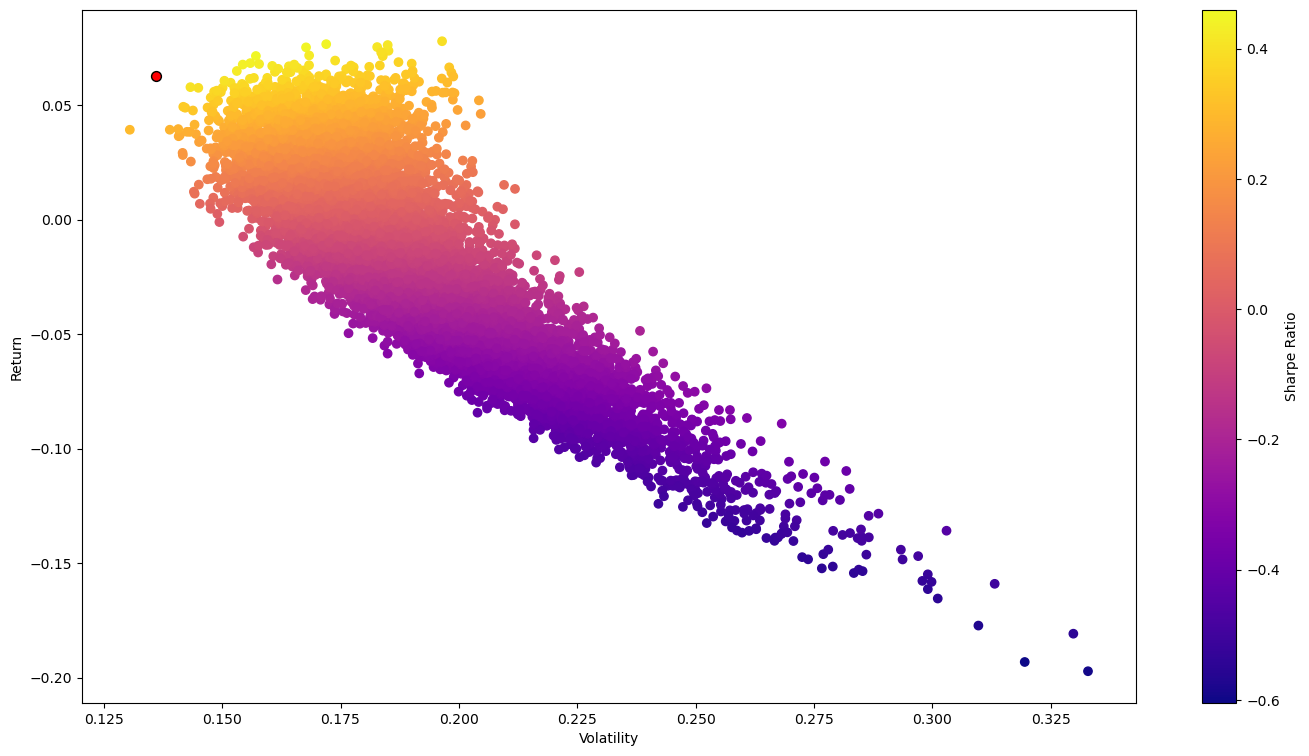

In [8]:
# Plot all the portfolio combination runs on a graph and point out the maximum sharpe ratio.
max_sr_ret = ret_arr[SR_max_loc]
max_sr_vol = vol_arr[SR_max_loc]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')